In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from datetime import datetime

# Loading the data

In [2]:
beers = pd.read_csv("data/processed/beers.csv", index_col="id")
beers.head()

,name,abv,meta_style,style,style_detailed,min_ibu,max_ibu,alcohol,astringency,bitter,...,brewery_type_store,availability,retired,ave_rating,rating_reviews_look,rating_reviews_smell,rating_reviews_taste,rating_reviews_feel,rating_reviews_overall,rating_reviews_score
id,,,,,,,,,,,,,,,,,,,,,
64620,the citizen,6.00,Other,california common / steam beer,california common / steam beer,35,45,7,18,45,...,0,year-round,0,3.74,NaN,NaN,NaN,NaN,NaN,NaN
82938,arthur,4.20,ale,mild ale - english pale,english pale mild ale,15,25,0,4,16,...,0,rotating,0,3.64,NaN,NaN,NaN,NaN,NaN,NaN
8107,medalla light,4.00,lager,lager - light,american light lager,8,12,10,15,9,...,0,year-round,0,2.82,NaN,NaN,NaN,NaN,NaN,NaN
3940,imperial,4.50,lager,lager - adjunct,american adjunct lager,8,18,4,34,22,...,0,year-round,0,2.80,3.0,2.75,3.0,3.0,3.0,2.8
34877,collaboration not litigation ale,8.72,ale,strong ale - belgian dark,belgian strong dark ale,25,50,24,10,11,...,0,rotating,0,3.93,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
reviews = pd.read_csv('data/raw/reviews.csv', parse_dates=["date"])
reviews.head()

,beer_id,username,date,text,look,smell,taste,feel,overall,score
0,271781,bluejacket74,2017-03-17,"750 ml bottle, 2016 vintage, bottle #304 of...",4.00,4.00,4.00,4.25,4.00,4.03
1,125646,_dirty_,2017-12-21,,4.50,4.50,4.50,4.50,4.50,4.50
2,125646,CJDUBYA,2017-12-21,,4.75,4.75,4.75,4.75,4.75,4.75
3,125646,GratefulBeerGuy,2017-12-20,0% 16 oz can. Funny story: As I finally wal...,4.75,4.75,4.50,4.50,4.50,4.58
4,125646,LukeGude,2017-12-20,Classic TH NEIPA. Overflowing head and bouq...,4.25,4.50,4.25,4.25,4.25,4.31


# Looking at the data

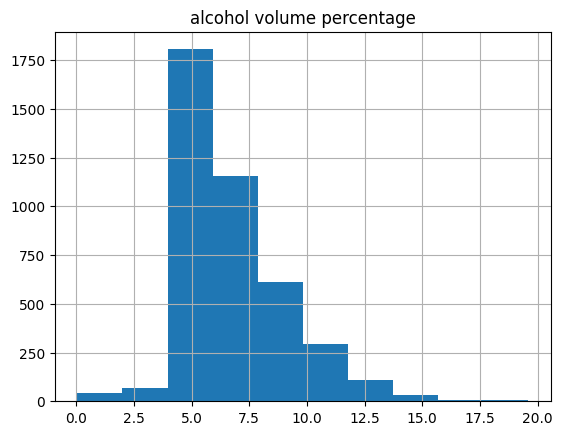

In [4]:
ax = beers.abv.hist()
_ = ax.set_title("alcohol volume percentage")

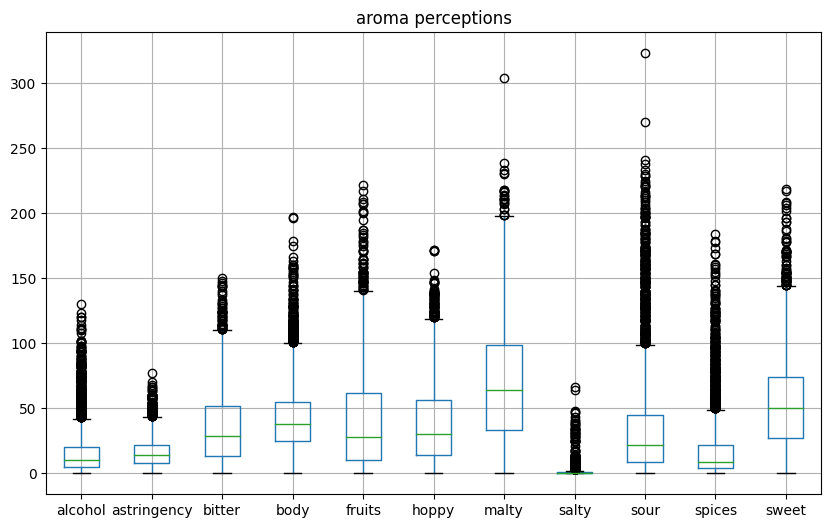

In [5]:
ax = beers.boxplot(column=['alcohol', 'astringency', 'bitter', 'body', 'fruits', 'hoppy', 'malty', 'salty', 'sour', 'spices', 'sweet'], figsize=(10,6))
_ = ax.set_title("aroma perceptions")

In [6]:
beers[['brewery_type_bar', 'brewery_type_beer_to_go',
       'brewery_type_eatery', 'brewery_type_homebrew', 'brewery_type_brewery',
       'brewery_type_store']].sum()

brewery_type_bar           2575
brewery_type_beer_to_go    2109
brewery_type_eatery        1309
brewery_type_homebrew        25
brewery_type_brewery       4135
brewery_type_store            0
dtype: int64

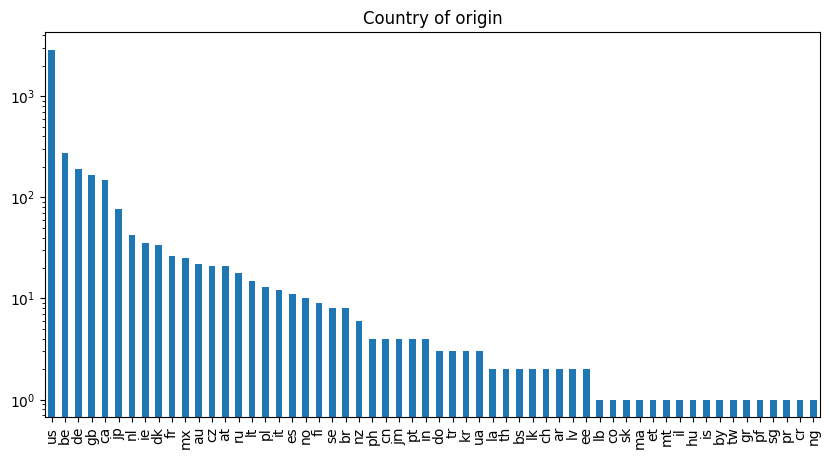

In [7]:
ax = beers["country"].value_counts().plot(kind='bar', figsize=(10,5))
_ = ax.set_title("Country of origin")
plt.yscale('log')

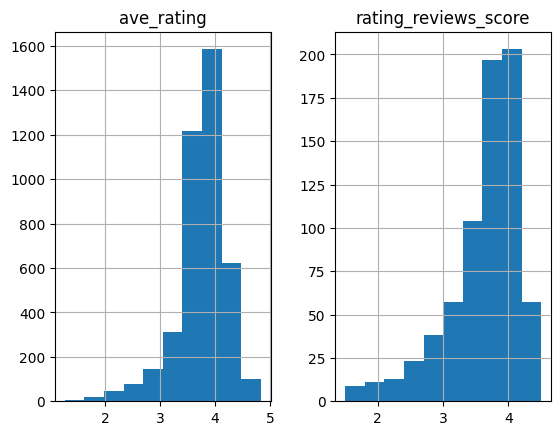

In [8]:
ax = beers.hist(column=['ave_rating', 'rating_reviews_score'])

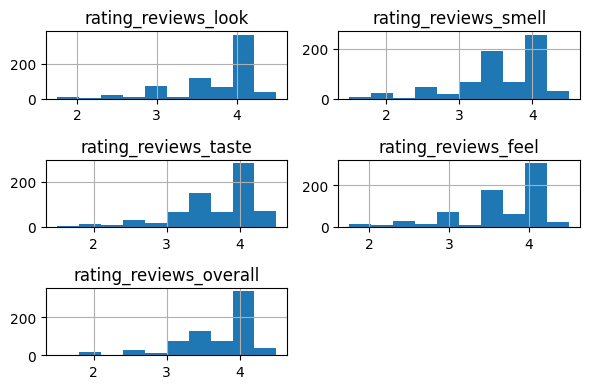

In [9]:
ax = beers.hist(column=['rating_reviews_look', 'rating_reviews_smell', 'rating_reviews_taste',
       'rating_reviews_feel', 'rating_reviews_overall'], figsize=(6,4))
plt.tight_layout()
plt.show()

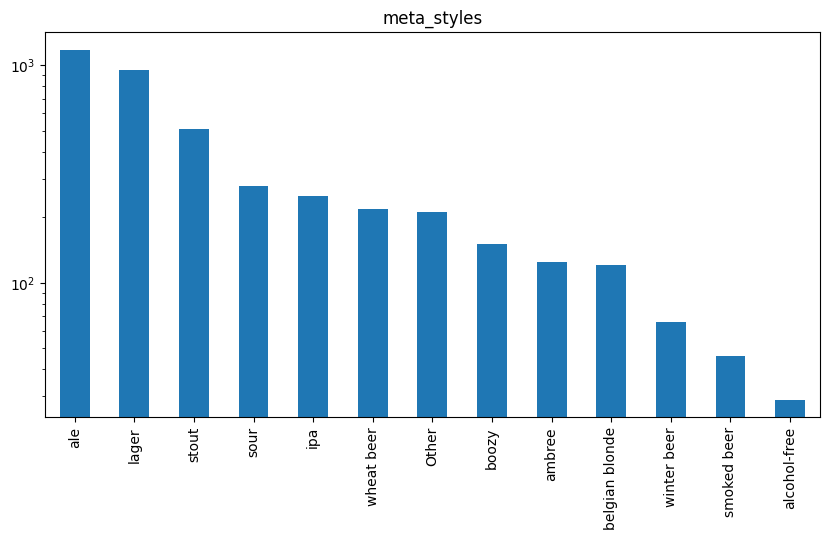

In [10]:
ax = beers["meta_style"].value_counts().plot(kind='bar', figsize=(10,5))
_ = ax.set_title("meta_styles")
plt.yscale('log')

# Preliminary analysis

### Is there a flavour difference between the best and worse rated beers for each metastyle ?

In [11]:
nb_beers = 20

# get the best rated nb_beers beers in each meta_style
best_beers_per_style = beers.sort_values('ave_rating', ascending=False).groupby('meta_style').head(nb_beers)
worse_beers_per_style = beers.sort_values('ave_rating', ascending=True).groupby('meta_style').head(nb_beers)

aroma_columns =  ['astringency', 'body',
       'alcohol', 'bitter', 'sweet', 'sour', 'salty', 'fruits', 'hoppy',
       'spices', 'malty']

# get the average aromatic profile of each meta_style
best_beers_per_style_mean = best_beers_per_style.groupby('meta_style').mean()[aroma_columns]
worse_beers_per_style_mean = worse_beers_per_style.groupby('meta_style').mean()[aroma_columns]

C:\Users\edoua\AppData\Local\Temp\ipykernel_14284\2528215885.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_beers_per_style_mean = best_beers_per_style.groupby('meta_style').mean()[aroma_columns]
C:\Users\edoua\AppData\Local\Temp\ipykernel_14284\2528215885.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  worse_beers_per_style_mean = worse_beers_per_style.groupby('meta_style').mean()[aroma_columns]


C:\Users\edoua\AppData\Local\Temp\ipykernel_14284\1654165820.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[row, col] = plt.subplot(nb_plot_rows, nb_plot_columns, i+1, polar=True)


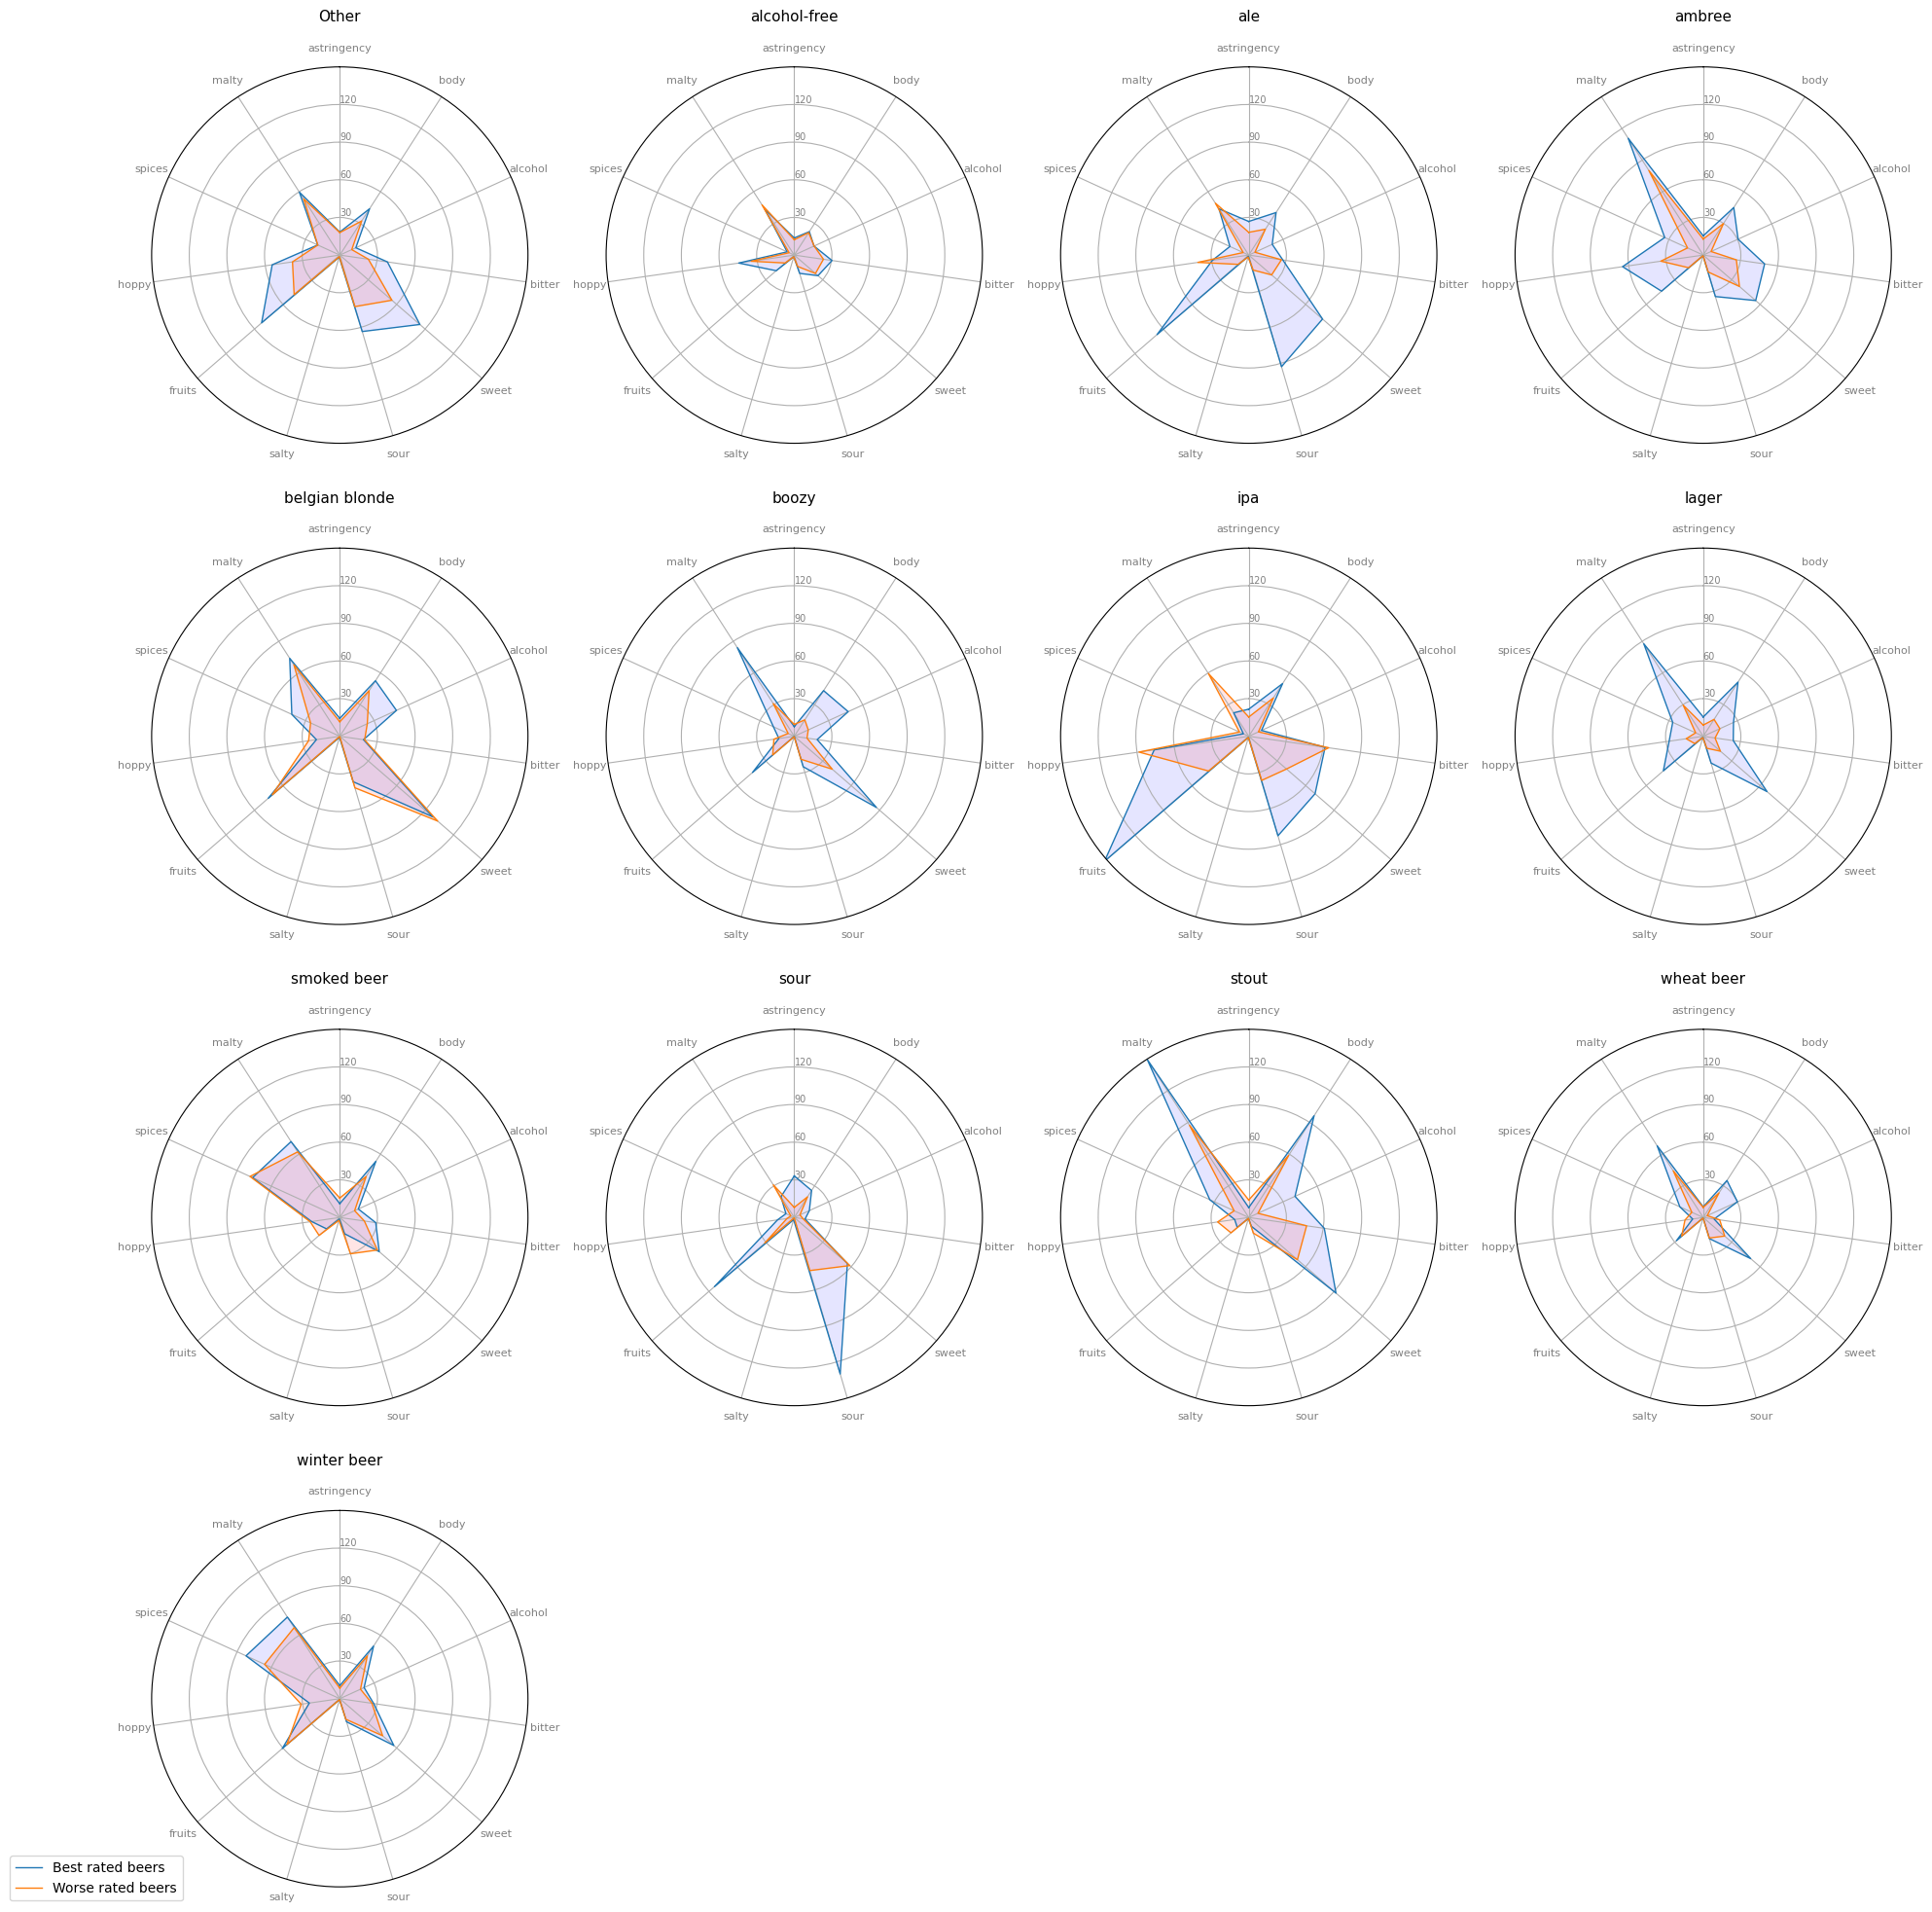

In [12]:
# plot on spider chart per style with the mean best and worse beer aromatic profile
nb_plot_columns = 4
nb_plot_rows = len(best_beers_per_style_mean.index) // nb_plot_columns + 1

fig, ax = plt.subplots(nb_plot_rows, nb_plot_columns, figsize=(20, 20))


for i, meta_style in enumerate(best_beers_per_style_mean.index):

    # ------- PART 1: Create background
    col = i % nb_plot_columns
    row = i // nb_plot_columns
    
    # number of variable
    categories=list(best_beers_per_style_mean)
    N = len(aroma_columns)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    ax[row, col] = plt.subplot(nb_plot_rows, nb_plot_columns, i+1, polar=True)

    # If you want the first axis to be on top:
    ax[row, col].set_theta_offset(np.pi / 2)
    ax[row, col].set_theta_direction(-1)
    
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    
    # Draw ylabels
    ax[row, col].set_rlabel_position(0)
    plt.yticks([30,60,90,120], ["30","60","90","120"], color="grey", size=7)
    plt.ylim(0,150)


    # ------- PART 2: Add plots
    
    # Plot each individual = each line of the data
    # I don't make a loop, because plotting more than 3 groups makes the chart unreadable
    
    # Ind1
    values=best_beers_per_style_mean.loc[meta_style].values.flatten().tolist()
    values += values[:1]
    ax[row, col].plot(angles, values, linewidth=1, linestyle='solid', label="Best rated beers")
    ax[row, col].fill(angles, values, 'b', alpha=0.1)

    # Ind2
    values=worse_beers_per_style_mean.loc[meta_style].values.flatten().tolist()
    values += values[:1]
    ax[row, col].plot(angles, values, linewidth=1, linestyle='solid', label="Worse rated beers")
    ax[row, col].fill(angles, values, 'r', alpha=0.1)

    # Add title and make background white
    ax[row, col].set_title(meta_style, size=11, y=1.1)
    ax[row, col].set_facecolor('white')

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.tight_layout()

# Make background color white
fig.patch.set_facecolor('white')

# remove empty plots
for i in range(len(best_beers_per_style_mean.index), nb_plot_columns * nb_plot_rows):
    col = i % nb_plot_columns
    row = i // nb_plot_columns
    fig.delaxes(ax[row, col])

plt.show()

### Which country makes what type of beer best ?

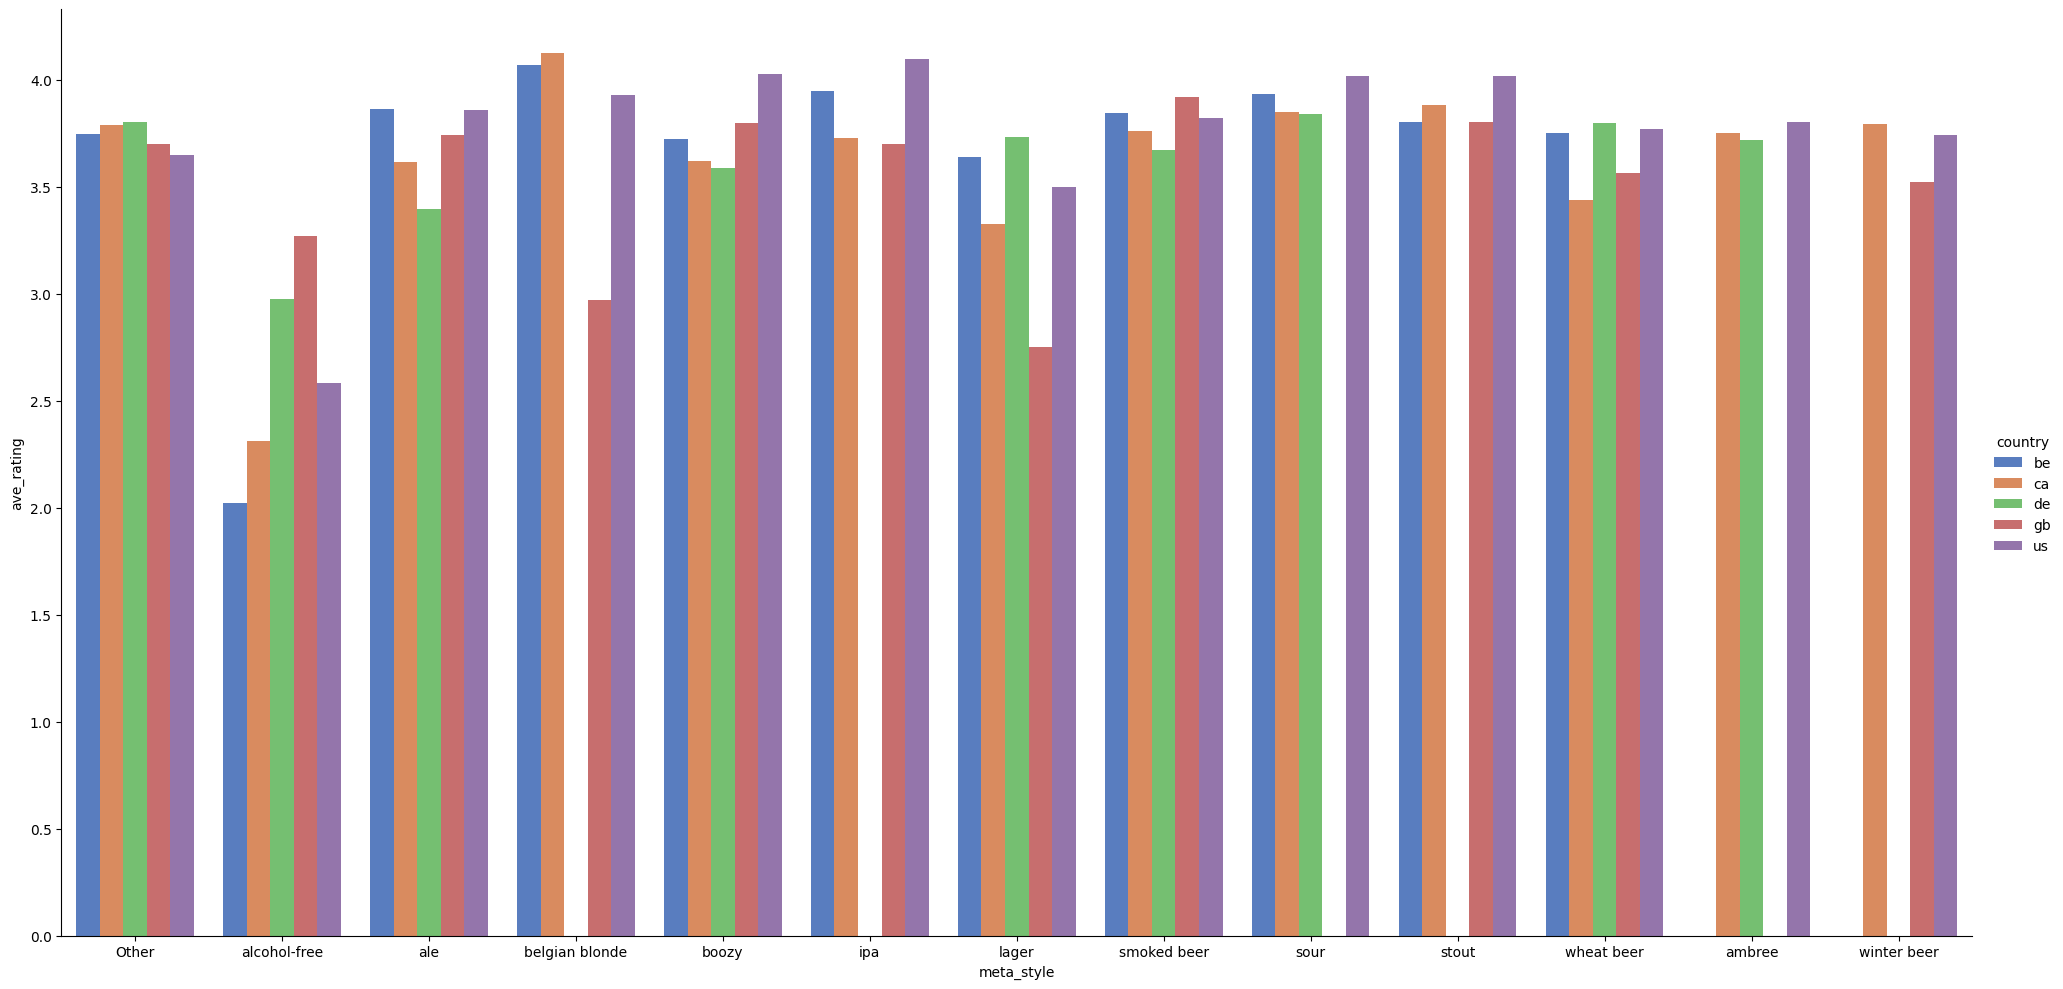

In [13]:
# display in a bar chart the average rating of each meta_style per country, only display countries with more than 100 beers

# get the average rating of each meta_style per country
meta_style_per_country = beers.groupby(['country', 'meta_style'])['ave_rating'].mean().reset_index()

# get the number of beers per country
nb_beers_per_country = beers.groupby('country')["name"].count().reset_index()

# merge the two dataframes
meta_style_per_country = meta_style_per_country.merge(nb_beers_per_country, on='country')

# keep only countries with more than 100 beers

meta_style_per_country = meta_style_per_country[meta_style_per_country['name'] > 100]
# drop germany
meta_style_per_country = meta_style_per_country[meta_style_per_country['country'] != 'DE']

# remove fruit and pils
meta_style_per_country = meta_style_per_country[meta_style_per_country['meta_style'] != 'Fruit']
meta_style_per_country = meta_style_per_country[meta_style_per_country['meta_style'] != 'Pilsner']

# plot the average rating of each meta_style per country
sns.catplot(x="meta_style", y="ave_rating", hue="country", data=meta_style_per_country, kind="bar", height=10, aspect=2, palette="muted")

### How has beer metastyle popularity changed through the years ? 

<AxesSubplot: xlabel='year', ylabel='ave_rating'>

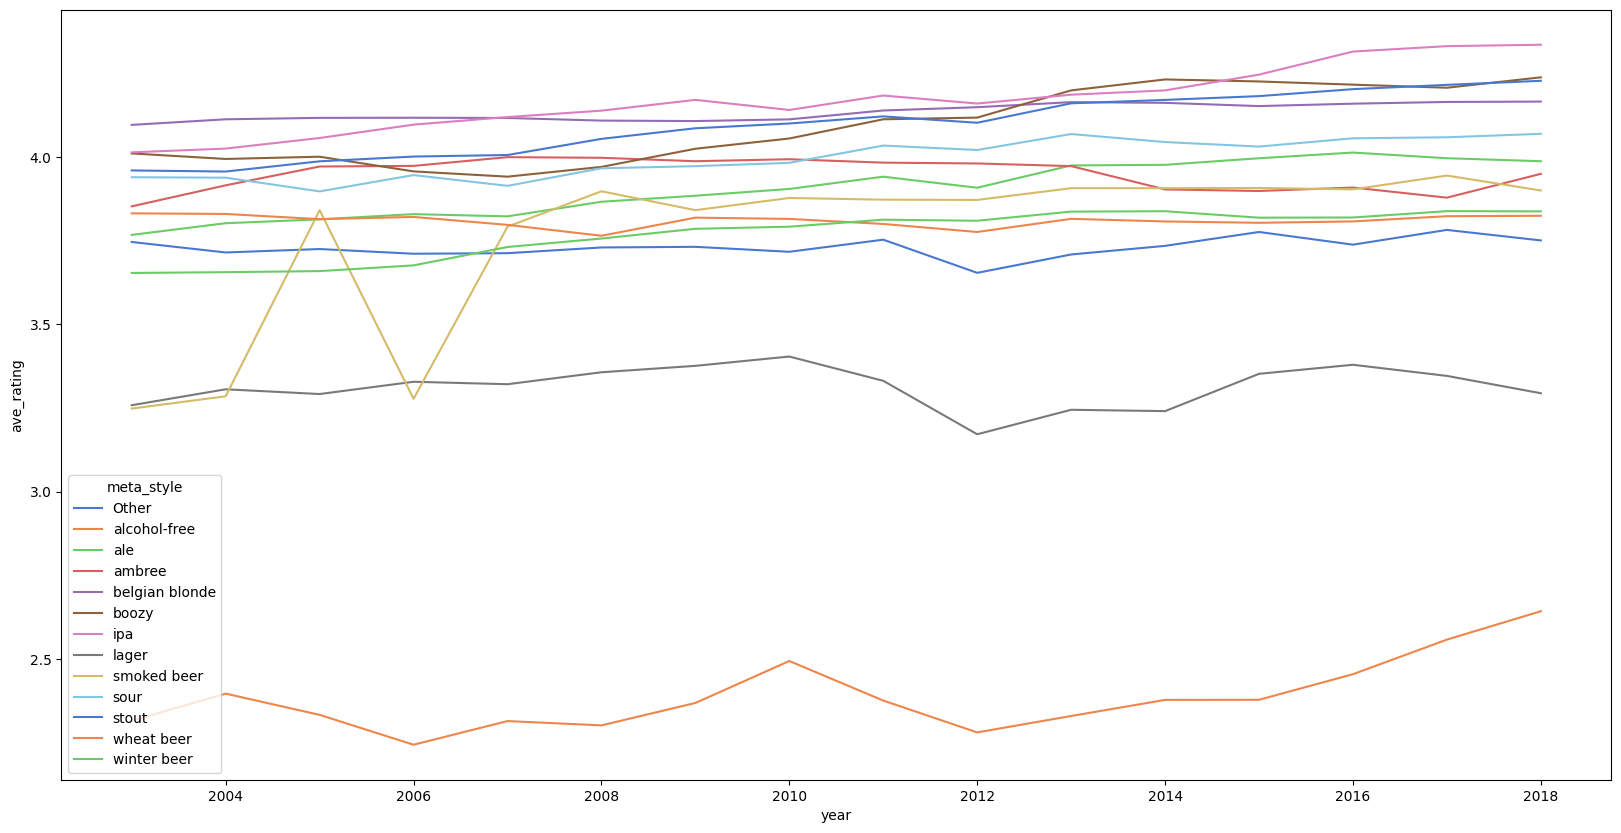

In [20]:
# Use only ratings starting from 2003
reviews_2003 = reviews[reviews['date'] > datetime.strptime('2003-01-01','%Y-%m-%d')]

# Print rating evolution over time for each meta_style
reviews_2003['year'] = reviews_2003['date'].dt.year.astype(int)
reviews_2003['month'] = reviews_2003['date'].dt.month.astype(int)

# get the average rating of each meta_style per year
review_meta_style = reviews_2003[["year", "beer_id"]].merge(beers[["meta_style", "ave_rating"]], left_on="beer_id", right_index = True, how="inner")
meta_style_per_year = review_meta_style.groupby(['year', 'meta_style'])['ave_rating'].mean().reset_index()

# plot the average rating of each meta_style per year
fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x="year", y="ave_rating", hue="meta_style", data=meta_style_per_year, palette="muted", ax=ax)

### Are there drinking trends of some Meta styles between seasons ? 

<AxesSubplot: xlabel='month', ylabel='Rating difference'>

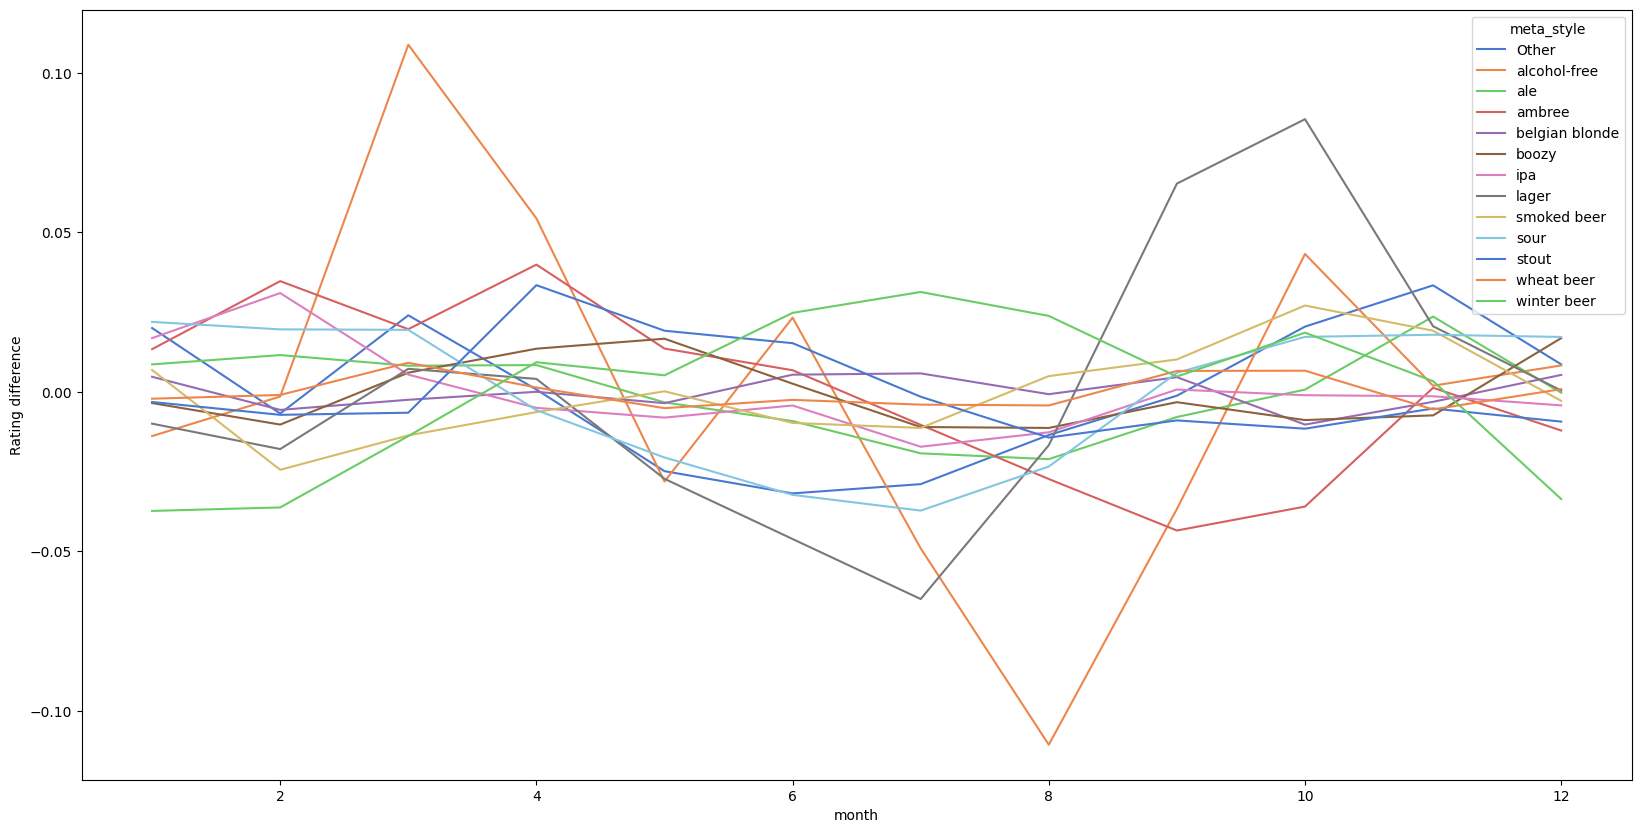

In [23]:
# get the average rating of each meta_style per year
review_meta_style = reviews_2003[["month", "beer_id"]].merge(beers[["meta_style", "ave_rating"]], left_on="beer_id", right_index = True, how="inner")
meta_style_per_month = review_meta_style.groupby(['month', 'meta_style'])['ave_rating'].mean().reset_index()

# plot the average rating of each meta_style per year
fig, ax = plt.subplots(figsize=(20, 10))

# for each style calculate the difference to the style mean
for meta_style in meta_style_per_month['meta_style'].unique():
    meta_style_per_month.loc[meta_style_per_month['meta_style'] == meta_style, 'Rating difference'] = meta_style_per_month.loc[meta_style_per_month['meta_style'] == meta_style, 'ave_rating'] - meta_style_per_month.loc[meta_style_per_month['meta_style'] == meta_style, 'ave_rating'].mean()

sns.lineplot(x="month", y="Rating difference", hue="meta_style", data=meta_style_per_month, palette="muted", ax=ax)

### Are beer alcohol contents getting stronger ?

<AxesSubplot: xlabel='year', ylabel='abv'>

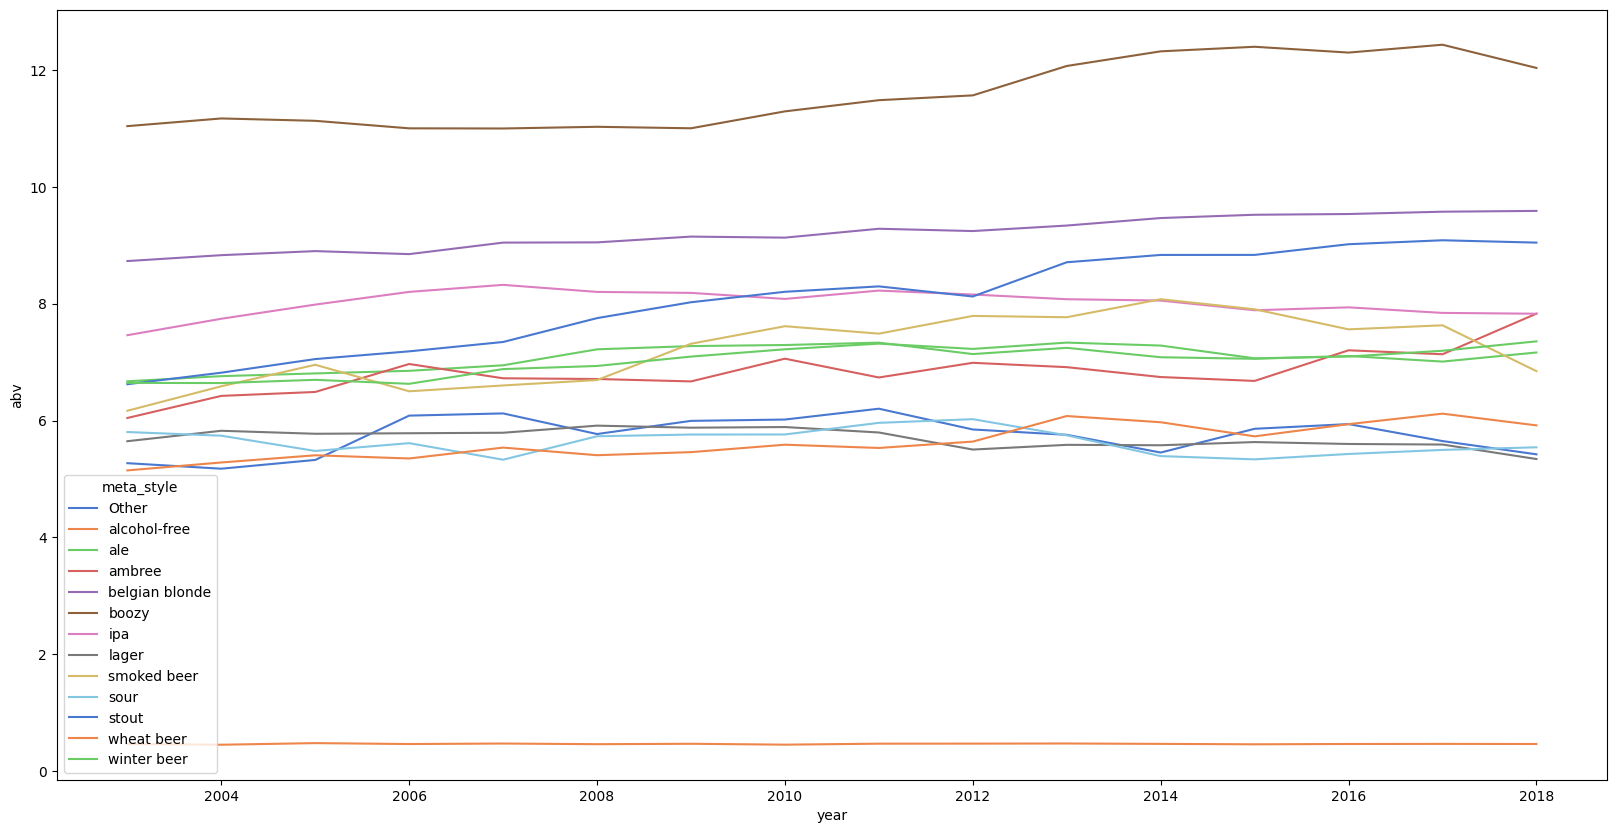

In [25]:
review_meta_style = reviews_2003[["year", "beer_id"]].merge(beers[["meta_style", "abv"]], left_on="beer_id", right_index = True, how="inner")
meta_style_per_year = review_meta_style.groupby(['year', 'meta_style'])['abv'].mean().reset_index()
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x="year", y="abv", hue="meta_style", data=meta_style_per_year, palette="muted", ax=ax)